In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

In [192]:
file = 'data/salesdaily.csv'
df = pd.read_csv(file)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
datum           2106 non-null object
M01AB           2106 non-null float64
M01AE           2106 non-null float64
N02BA           2106 non-null float64
N02BE           2106 non-null float64
N05B            2106 non-null float64
N05C            2106 non-null float64
R03             2106 non-null float64
R06             2106 non-null float64
Year            2106 non-null int64
Month           2106 non-null int64
Hour            2106 non-null int64
Weekday Name    2106 non-null object
dtypes: float64(8), int64(3), object(2)
memory usage: 214.0+ KB


In [145]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


- M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances
- M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives
- N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives
- N02BE - Other analgesics and antipyretics, Pyrazolones and Anilides
- N05B - Psycholeptics drugs, Anxiolytic drugs
- N05C - Psycholeptics drugs, Hypnotics and sedatives drugs
- R03 - Drugs for obstructive airway diseases
- R06 - Antihistamines for systemic use

#### So, let's create a chart bulder function and explore sales dynamic by markets

In [29]:
#grouping ATC codes by types of drugs
atc_codes = {'Antirheumatic' : ['M01AB','M01AE'],
             'Analgesics' : ['N02BA','N02BE'],
             'Psycholeptics' : ['N05C','N05B'],
             'Airway diseases': ['R03'],
             'Antihistamines': ['R06']}

In [213]:
#function that will help us to explore a sales dynamic
def create_charts(data, markets, title, index, freq):
    fig, ax = plt.subplots(1, 1, sharex=True, figsize=(15,5))
    for codes in markets:
        ax.set_title('{} market'.format(title))
        index = data[codes].resample(freq).sum().index
        plt.plot(index, data[codes].resample(freq).sum())
        register_matplotlib_converters()
        plt.legend();

In [193]:
df['datum'] = pd.to_datetime(df['datum'])
df = df.set_index('datum')

#### Now we are ready to observe how sales changes

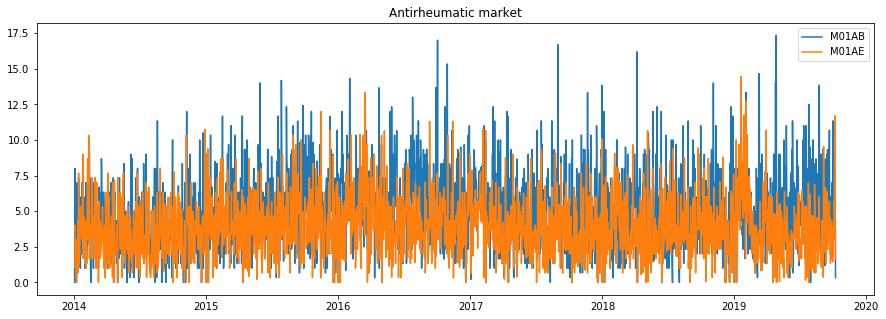

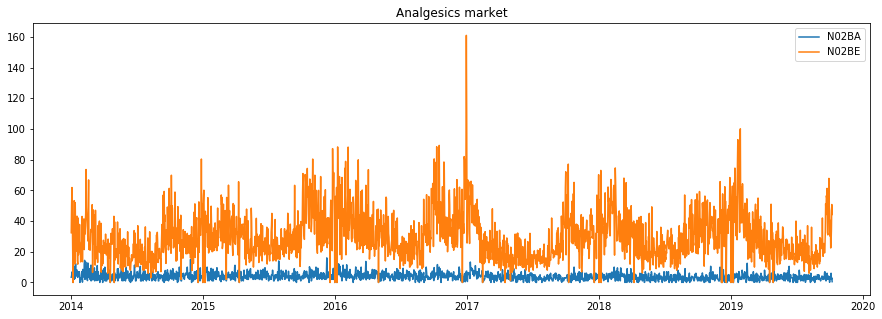

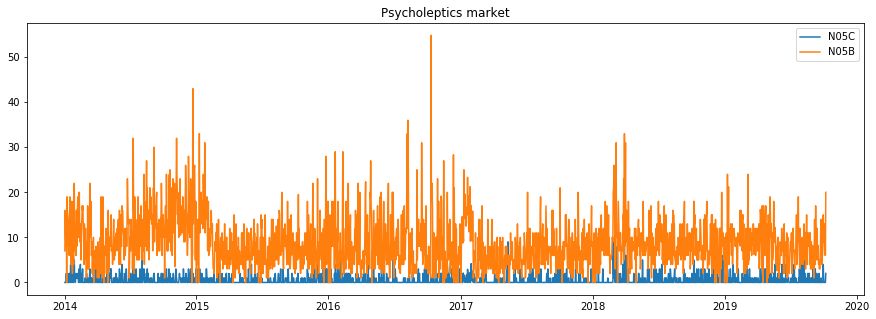

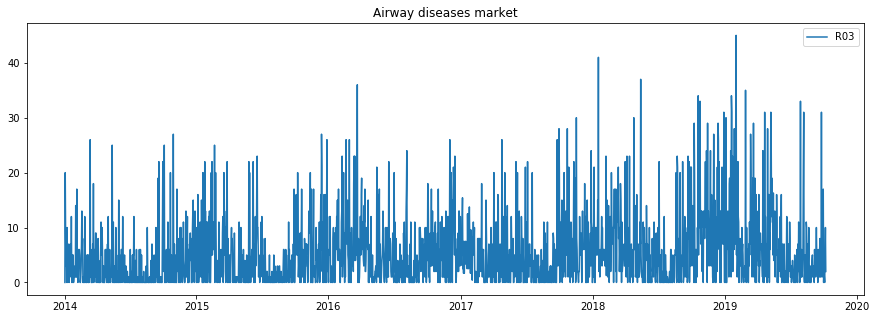

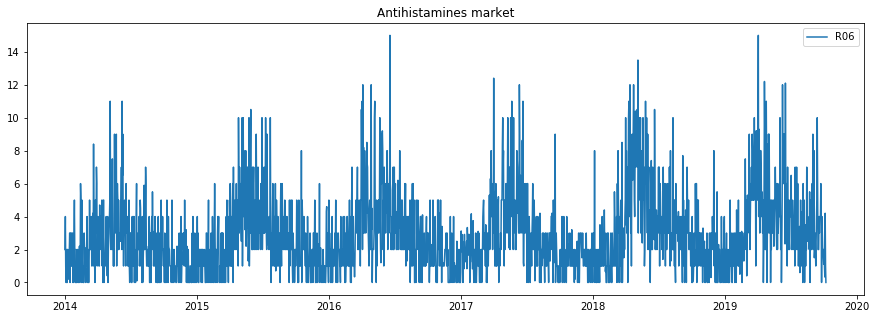

In [214]:
for market in atc_codes.items():
    create_charts(df, market[1], market[0], df.index, 'D')

Easy to see a clear seasonals of sales of antihistamines and analgesics products.<br>
Also, on the first sight, sales of antirheumatic drugs can seems a quite stationary <br>
However, let's look at monthly sales, without highly frequency of daily data

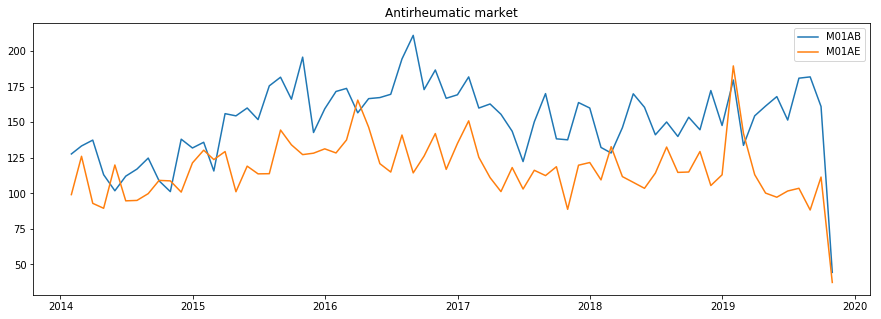

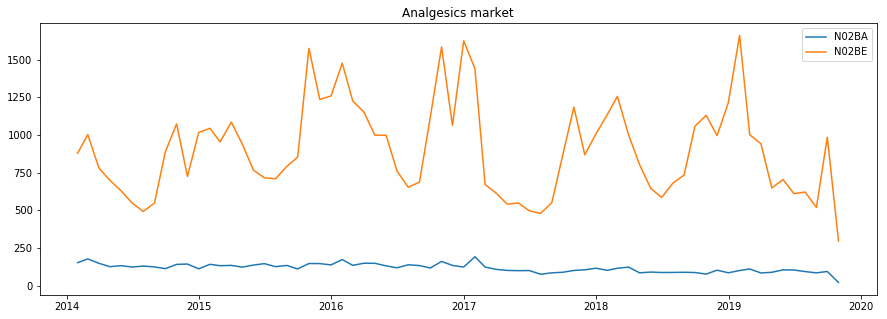

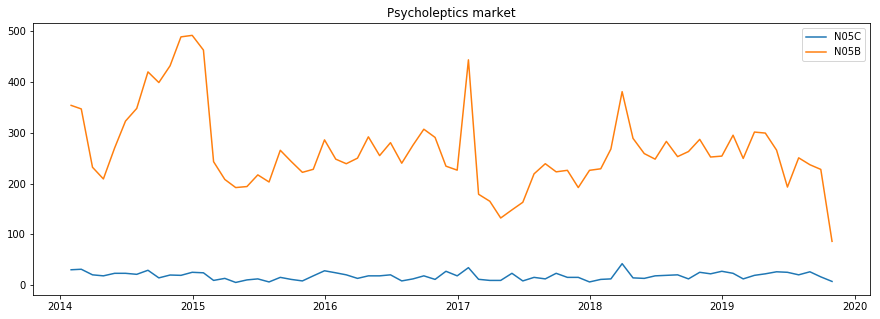

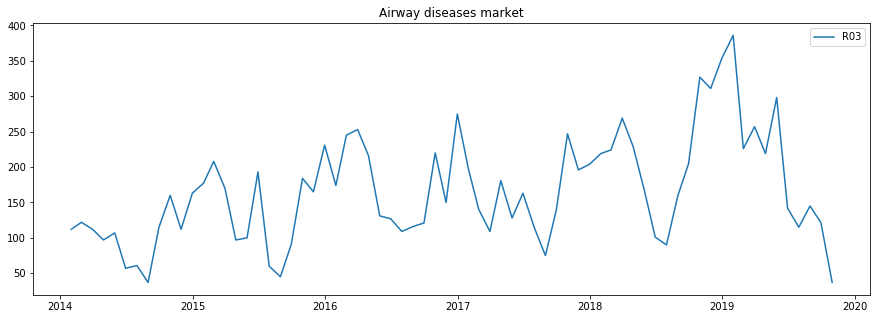

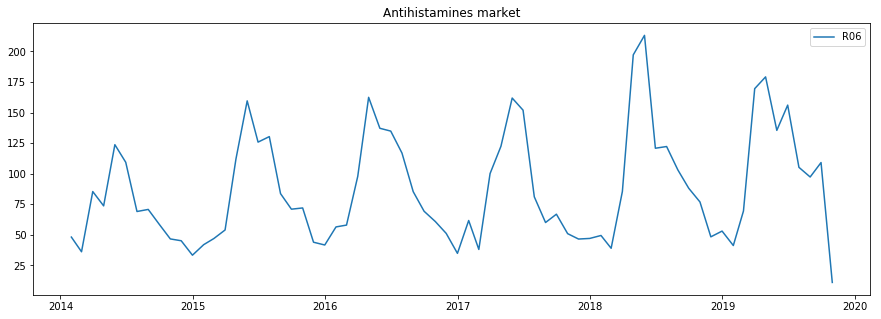

In [219]:
for market in atc_codes.items():
    create_charts(df, market[1], market[0], df.index, 'M')

Great! Now data is much more readable and we can see that all of the markets except one have seasonal<br>
You also can notice an increasing amount of sales during 2015 year on psycholeptics market and sharp decline then<br>
Sales of the airway disease market additionally for seasonals include an improving trend

